In [1]:
import os
import pandas as pd
import numpy as np

import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr,spearmanr
import warnings
warnings.filterwarnings("ignore")#忽略警告

import datetime
from collections import Counter
from scipy import stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# from calendar import day_abbr, month_abbr, mdays
# import holidays
# from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('./data/preprocessed/data.csv')

In [3]:
df['Date']=pd.to_datetime(df['Date'].astype('str'))
df.set_index('Date',drop=True,inplace=True)

In [4]:
x = df.iloc[:,1:]  # features
x_train=x.loc['2019-01-01':'2022-01-31',:]
x_test=x.loc['2022-02-01':'2022-04-30',:]
y = df.loc[:, ['Price']]  # target
y_train=y.loc['2019-01-01':'2022-01-31',:]
y_test=y.loc['2022-02-01':'2022-04-30',:]

In [5]:
# Pre-process data
scaler = MinMaxScaler() 
x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.transform(x_test)
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train)
x_test2 = scaler.transform(x_test)

### Linear regression without time offset

In [6]:
def linear(X,Y):    
    for n in X.iloc[:,1:]:
        # Training data
        x = pd.DataFrame(X[str(n)] ) # features
        x_train=x.loc['2019-01-01':'2022-01-31',:]
        x_test=x.loc['2022-02-01':'2022-04-30',:]
        y_train=y.loc['2019-01-01':'2022-01-31',:]
        y_test=y.loc['2022-02-01':'2022-04-30',:]
        # Train the model
        model = LinearRegression()
        model.fit(x_train, y_train)

        # Store the fitted values as a time series with the same time index as
        # the training data
        y_pred = pd.Series(model.predict(x_test).T[0], index=x_test.index)
        print(str(n),'MSE:',mean_squared_error(y_test,y_pred),'\nr2_score:', r2_score(y_test,y_pred))

In [7]:
linear(x,y)

netimport MSE: 835.1257325814788 
r2_score: -0.2736288231961621
EV MSE: 655.936522673027 
r2_score: -0.0003519576400101698
carbon MSE: 1023.3309920380427 
r2_score: -0.5606558345421515
crude MSE: 1530.9219816490315 
r2_score: -1.3347698266530883
gas MSE: 950.348852527793 
r2_score: -0.44935264649231077
temp MSE: 660.9757768850009 
r2_score: -0.008037194917926982
precip MSE: 778.202324839947 
r2_score: -0.18681639485670964
wind MSE: 704.6238539924514 
r2_score: -0.0746037571878948


In [8]:
# Train the model
model = LinearRegression()
model.fit(x_train1, y_train)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(x_test1).T[0], index=x_test.index)
print('MSE:',mean_squared_error(y_test,y_pred),'\nr2_score:', r2_score(y_test,y_pred))

MSE: 743.2678526759414 
r2_score: -0.1335387278715403


In [9]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
def linear1(Xdata,Y):    
    for n in Xdata.iloc[:,1:]:
        x = pd.DataFrame(Xdata[str(n)] )
        X = sm.add_constant(x)
        model = sm.OLS(Y,X)
        results = model.fit()
        plt.scatter(x,Y,alpha=0.3)
        y_predict = results.params[0] + results.params[1]*x
        print(str(n))
        plt.plot(x,y_predict, linewidth=3)
        plt.xlabel(str(n))
        plt.ylabel('Power Price')
        plt.title('OLS Regression')
        print(results.summary())
        plt.show()
        print('\n\n\n')

netimport
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     261.9
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           1.74e-53
Time:                        04:14:54   Log-Likelihood:                -5329.1
No. Observations:                1216   AIC:                         1.066e+04
Df Residuals:                    1214   BIC:                         1.067e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        241.9761     13.014     18.59

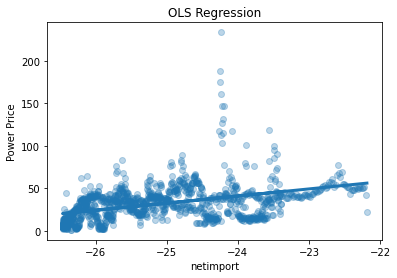





EV
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.542
Date:                Fri, 05 Aug 2022   Prob (F-statistic):             0.0601
Time:                        04:14:55   Log-Likelihood:                -5446.1
No. Observations:                1216   AIC:                         1.090e+04
Df Residuals:                    1214   BIC:                         1.091e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.8211      1.585     18.185  

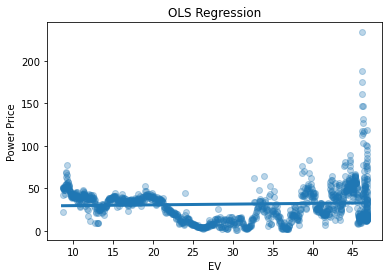





carbon
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     107.7
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           3.15e-24
Time:                        04:14:55   Log-Likelihood:                -5396.2
No. Observations:                1216   AIC:                         1.080e+04
Df Residuals:                    1214   BIC:                         1.081e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0374      1.257     15.9

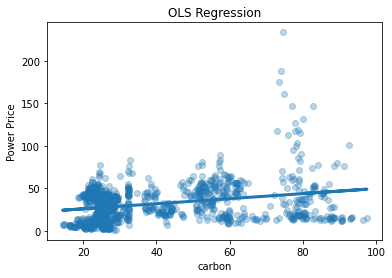





crude
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     166.1
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           1.04e-35
Time:                        04:14:55   Log-Likelihood:                -5369.9
No. Observations:                1216   AIC:                         1.074e+04
Df Residuals:                    1214   BIC:                         1.075e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1633      2.054      3.00

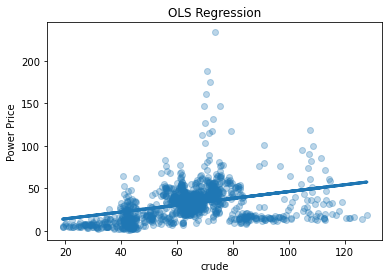





gas
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     173.6
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           3.71e-37
Time:                        04:14:56   Log-Likelihood:                -5366.5
No. Observations:                1216   AIC:                         1.074e+04
Df Residuals:                    1214   BIC:                         1.075e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3061      1.571      7.836 

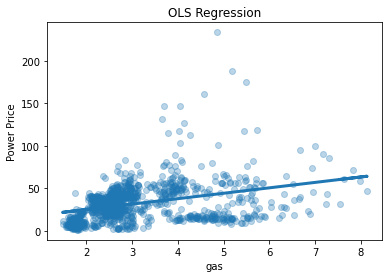





temp
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     38.76
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           6.59e-10
Time:                        04:14:56   Log-Likelihood:                -5428.7
No. Observations:                1216   AIC:                         1.086e+04
Df Residuals:                    1214   BIC:                         1.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.6823      0.894     39.902

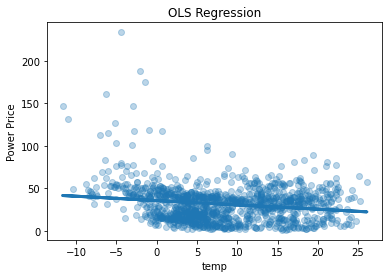





precip
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     97.28
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           3.98e-22
Time:                        04:14:56   Log-Likelihood:                -5401.0
No. Observations:                1216   AIC:                         1.081e+04
Df Residuals:                    1214   BIC:                         1.082e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.3315      3.274     19.3

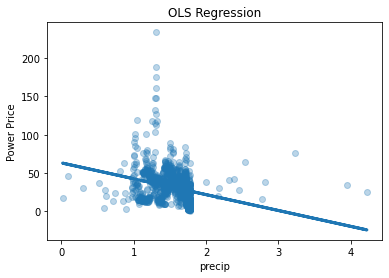





wind
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     132.1
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           4.21e-29
Time:                        04:14:57   Log-Likelihood:                -5385.0
No. Observations:                1216   AIC:                         1.077e+04
Df Residuals:                    1214   BIC:                         1.078e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.3175      6.009     16.695

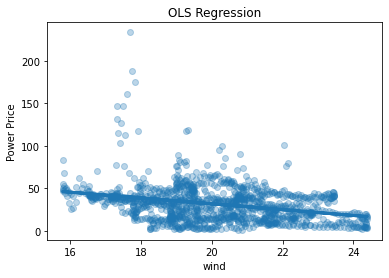

In [10]:
linear1(x,y)

### Linear regression with time offset

#### autoregression

In [11]:
Df=df.copy()
Df['Lag_1'] = Df['Price'].shift(1)
Df = Df.reindex(columns=['Price', 'Lag_1'])
X = Df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = Df.loc[:, ['Price']]  # create the target
y, X = y.align(X, join='inner',axis=0)  # drop corresponding values in target

In [12]:
x_train=X.loc['2019-01-02':'2022-01-31',:]
x_test=X.loc['2022-02-01':'2022-04-30',:]
y_train=y.loc['2019-01-02':'2022-01-31',:]
y_test=y.loc['2022-02-01':'2022-04-30',:]

In [13]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = pd.Series(model.predict(x_test).T[0], index=x_test.index)

In [14]:
print('MSE:',mean_squared_error(y_test,y_pred),'\nr2_score:', r2_score(y_test,y_pred))

MSE: 463.7243282696216 
r2_score: 0.29278592736472053


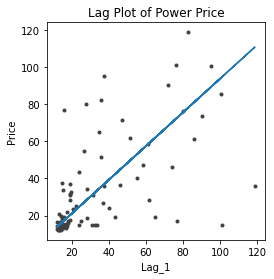

In [15]:
fig, ax = plt.subplots()
ax.plot(x_test, y_test, '.', color='0.25')
ax.plot(x_test, y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Price')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Power Price');

In [16]:
x_test

,Lag_1
Date,
2022-02-01,27.65
2022-02-02,80.15
2022-02-03,76.12
2022-02-04,101.22
2022-02-05,14.76
...,...
2022-04-26,40.27
2022-04-27,23.94
2022-04-28,43.43


In [17]:
y_pred

Date
2022-02-01    28.003907
2022-02-02    75.736144
2022-02-03    72.072127
2022-02-04    94.892682
2022-02-05    16.284506
                ...    
2022-04-26    39.477828
2022-04-27    24.630829
2022-04-28    42.350854
2022-04-29    20.412208
2022-04-30    31.440628
Length: 89, dtype: float64

In [18]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
    linewidth=1.5
)

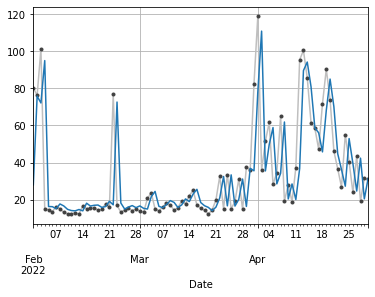

In [19]:
ax = y_test.plot(**plot_params)
ax = y_pred.plot()
plt.grid()

#### regression with elements

In [20]:
def linear2(df,n):
    
    df['Lag_1'] = df['Price'].shift(1)
    df['Lag'+n] = df[n].shift(1)
    df1 = df.reindex(columns=['Price','Lag'+n, 'Lag_1'])
    X = df.loc[:, ['Lag'+n,'Lag_1']]
    X.dropna(inplace=True)  # drop missing values in the feature set
    y = df.loc[:, ['Price']]  # create the target
    y, X = y.align(X, join='inner',axis=0)  # drop corresponding values in target
    x_train=X.loc['2019-01-02':'2022-01-31',:]
    x_test=X.loc['2022-02-01':'2022-04-30',:]
    y_train=y.loc['2019-01-02':'2022-01-31',:]
    y_test=y.loc['2022-02-01':'2022-04-30',:]
    scaler = MinMaxScaler() 
    x_train1 = scaler.fit_transform(x_train)
    x_test1 = scaler.transform(x_test)
    scaler = StandardScaler()
    x_train2 = scaler.fit_transform(x_train)
    x_test2 = scaler.transform(x_test)

    model = LinearRegression()
    model.fit(x_train1, y_train)

    y_pred = pd.Series(model.predict(x_test1).T[0], index=x_test.index)
    print('MSE:',mean_squared_error(y_test,y_pred),'\nr2_score:', r2_score(y_test,y_pred))

    fig, ax = plt.subplots()
    ax = sns.regplot(x='Lag'+n, y='Price', data=df, ci=None, scatter_kws=dict(color='0.25'))
    ax.set_title('Lag '+n+' of Power Price')
    
#     plt.plot(x_test['Lag'+n],y_test, '.', color='0.25')
#     plt.plot(x_test['Lag'+n],y_pred)
# #     plt.set_aspect('equal')
#     plt.ylabel('Price')
#     plt.xlabel('Lag '+n)
#     plt.title('Lag Plot of Power Price');
    
    plot_params = dict(
        color="0.75",
        style=".-",
        markeredgecolor="0.25",
        markerfacecolor="0.25",
        legend=False,
        linewidth=1.5
    )
    y_test.plot(**plot_params)
    y_pred.plot()
    plt.grid()
    plt.tight_layout()

MSE: 450.4582970722596 
r2_score: 0.31301761110191306


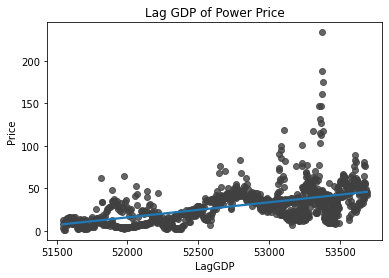

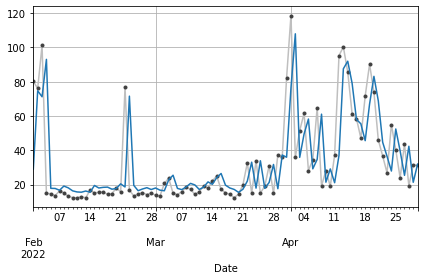

In [21]:
linear2(df,'GDP')

MSE: 456.34054238968605 
r2_score: 0.30404674972248114


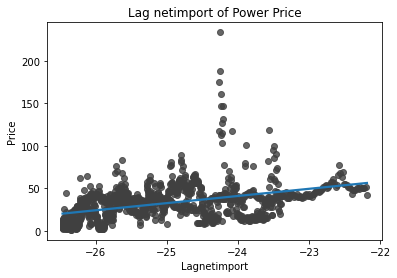

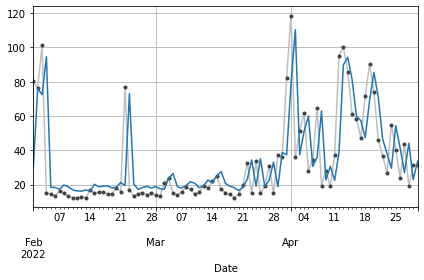

In [22]:
linear2(df,'netimport')

MSE: 463.6060866949222 
r2_score: 0.29296625455589886


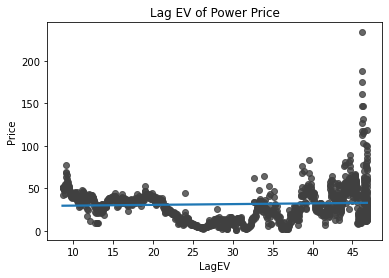

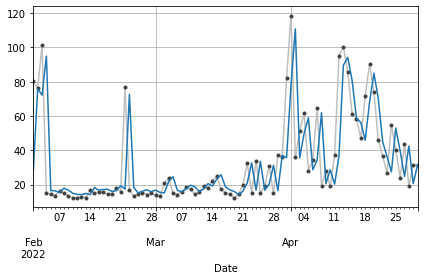

In [23]:
linear2(df,'EV')

MSE: 462.62224650762005 
r2_score: 0.29446668397757825


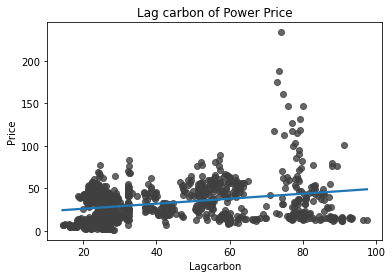

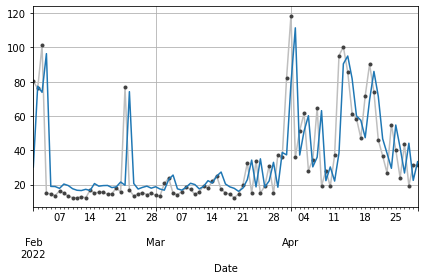

In [24]:
linear2(df,'carbon')

MSE: 464.76610882460415 
r2_score: 0.2911971345751969


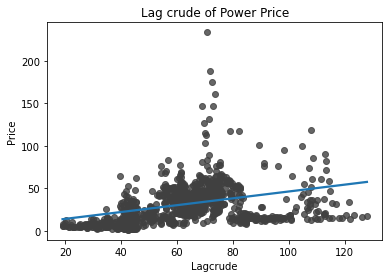

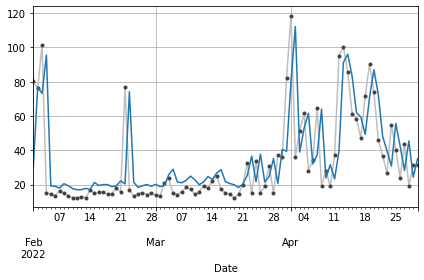

In [25]:
linear2(df,'crude')

MSE: 461.3388526665138 
r2_score: 0.29642395498932483


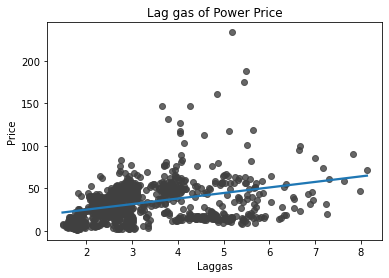

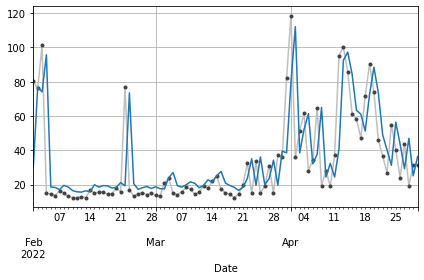

In [26]:
linear2(df,'gas')

MSE: 463.3568467496787 
r2_score: 0.29334636400022496


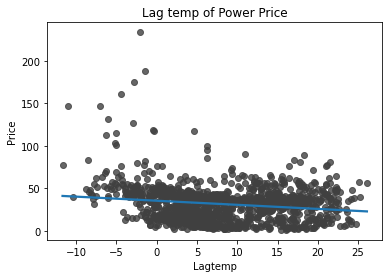

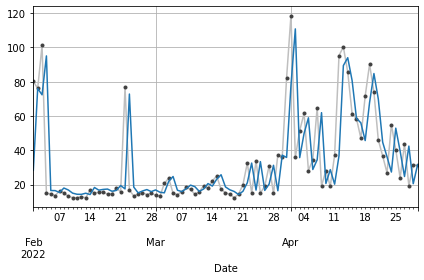

In [27]:
linear2(df,'temp')

MSE: 461.39701966337265 
r2_score: 0.2963352459951364


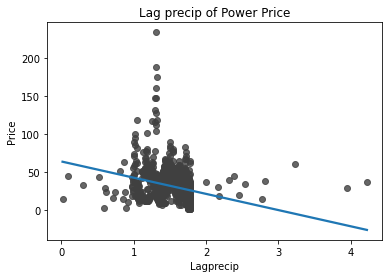

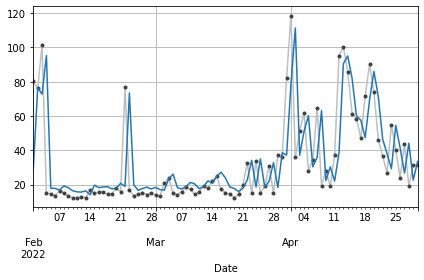

In [28]:
linear2(df,'precip')

MSE: 458.2128347401914 
r2_score: 0.30119136470676355


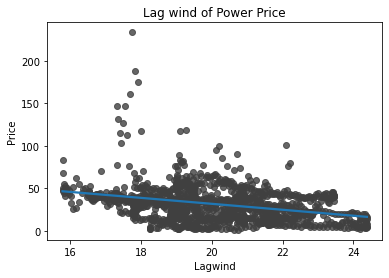

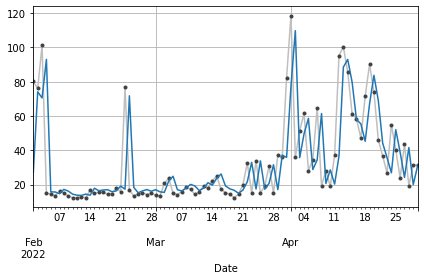

In [29]:
linear2(df,'wind')